In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [13]:
#exemplo de DataFrame
np.random.seed(42)
data = {
    'x': np.random.rand(50) * 10,
    'y': np.random.rand(50) * 10,
    'z': np.random.rand(50) * 100
}
df = pd.DataFrame(data)
y_data = df['y']


In [10]:
#Informações básicas sobre o DataFrame
#df = pd.read_csv('Caminho relativo')
df.info()
print(f'-----------')
print(f'Número de colunas: {len(df.columns)}')
print(f'-----------')
print(f'Nomes das colunas: {df.columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
 2   z       50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB
-----------
Número de colunas: 3
-----------
Nomes das colunas: Index(['x', 'y', 'z'], dtype='object')


In [11]:
#Opções de amostras do data frame.
#tamanho limite da visualização das amostras.
pd.set_option('display.max_columns', 30) #none para sem limite
pd.set_option('display.max_rows', 30)
display(df)

,x,y,z
0,3.745401,9.695846,3.142919
1,9.507143,7.751328,63.641041
2,7.319939,9.394989,31.435598
3,5.986585,8.948274,50.857069
4,1.560186,5.979000,90.756647
...,...,...,...
45,6.625223,4.937956,3.688695
46,3.117111,5.227328,60.956433
47,5.200680,4.275410,50.267902
48,5.467103,0.254191,5.147875


Standart Histogram plot

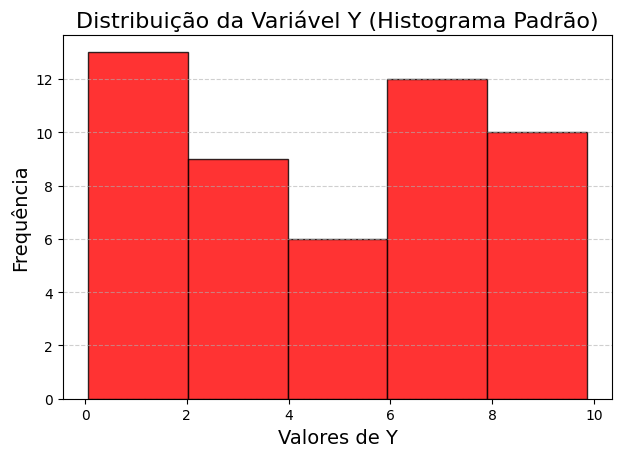

In [17]:
# Tamanho da Figura em Centímetros
width_cm = 18
height_cm = 12
inches_per_cm = 1 / 2.54
width_in = width_cm * inches_per_cm
height_in = height_cm * inches_per_cm

# Título e Rótulos
titulo_base = 'Distribuição da Variável Y'
label_y_data = 'Valores de Y'
tamanho_titulo = 16
cor_titulo = 'black'
tamanho_label = 14
cor_label = 'black'

# Configurações do Histograma
bins = 5 # Número de barras
cor_hist = 'red'
borda_hist = 'black'
alpha_hist = 0.8

#HISTOGRAMA PADRÃO
plt.figure(figsize=(width_in, height_in))
plt.hist(y_data, bins=bins, color=cor_hist, edgecolor=borda_hist, alpha=alpha_hist)

plt.xlabel(label_y_data, fontsize=tamanho_label, color=cor_label)
plt.ylabel('Frequência', fontsize=tamanho_label, color=cor_label)
plt.title(f'{titulo_base} (Histograma Padrão)', fontsize=tamanho_titulo, color=cor_titulo)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#plt.savefig('histograma_padrao.png', dpi=300)

Histrogram with box plot

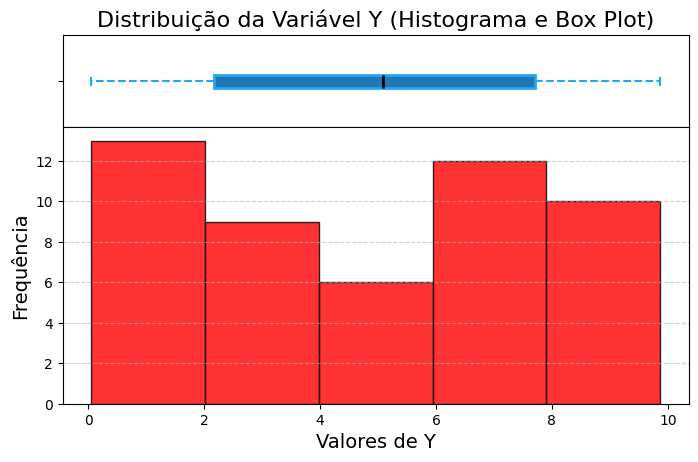

In [18]:
# Tamanho da Figura em Centímetros
width_cm = 18
height_cm = 12
inches_per_cm = 1 / 2.54
width_in = width_cm * inches_per_cm
height_in = height_cm * inches_per_cm

# Título e Rótulos
titulo_base = 'Distribuição da Variável Y'
label_y_data = 'Valores de Y'
tamanho_titulo = 16
cor_titulo = 'black'
tamanho_label = 14
cor_label = 'black'

# Configurações do Histograma
bins = 5 # Número de barras
cor_hist = 'red'
borda_hist = 'black'
alpha_hist = 0.8

# Configurações do Box Plot
cor_box = '#22a7f2' # Hexadecimal
mediana_box = 'black'
cor_borda_box = '#22a7f2'

#HISTOGRAMA COM BOX PLOT
fig = plt.figure(figsize=(width_in, height_in))
gs = GridSpec(4, 1, figure=fig, hspace=0)
ax_box = fig.add_subplot(gs[0, 0])
ax_hist = fig.add_subplot(gs[1:, 0], sharex=ax_box)

# Configurações do Box Plot
boxprops = dict(linestyle='-', linewidth=2, color=cor_borda_box)
medianprops = dict(linestyle='-', linewidth=2, color=mediana_box)
whiskerprops = dict(linestyle='--', linewidth=1.5, color=cor_box)
capprops = dict(linewidth=1.5, color=cor_box)

# Box Plot
ax_box.boxplot(y_data, vert=False, patch_artist=True,
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'))

ax_box.set_title(f'{titulo_base} (Histograma e Box Plot)', fontsize=tamanho_titulo, color=cor_titulo)
ax_box.tick_params(axis='y', labelleft=False)
ax_box.tick_params(axis='x', labelbottom=False)

# Histograma
ax_hist.hist(y_data, bins=bins, color=cor_hist, edgecolor=borda_hist, alpha=alpha_hist)

ax_hist.set_xlabel(label_y_data, fontsize=tamanho_label, color=cor_label)
ax_hist.set_ylabel('Frequência', fontsize=tamanho_label, color=cor_label)
ax_hist.grid(axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
#plt.savefig('histograma_com_boxplot.png')

CDF

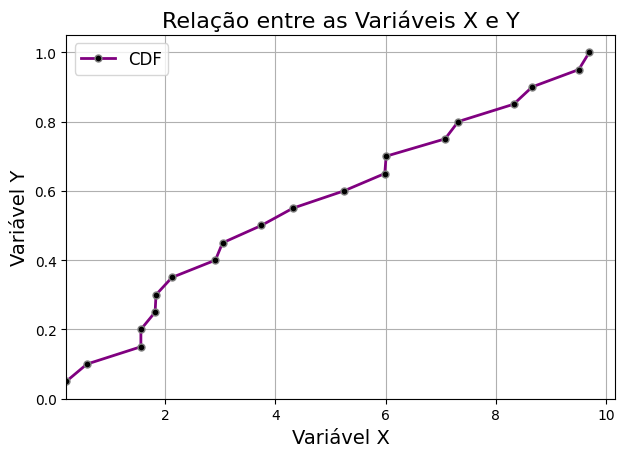

In [29]:
def obtain_cdf(x: list) -> tuple[list, list]:
    """
    Obtain the cumulative distribution function (CDF) of a list of values.

    :param x: values
    :return: [0] = sorted values, [1] = CDF of the input values
    """
    
    x_sorted = np.sort(x)
    x_cdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

    return list(x_sorted), list(x_cdf)

#Seleciona a coluna de dados e a converte para lista
dados_para_cdf_lista = df['x'].tolist()

#Chama a função para obter os eixos x e y da CDF
x_cdf, y_cdf = obtain_cdf(dados_para_cdf_lista)

# Configurações do Tamanho do Gráfico em centímetros
largura_cm = 18
altura_cm = 12
polegadas_por_cm = 1 / 2.54
largura_in = largura_cm * polegadas_por_cm
altura_in = altura_cm * polegadas_por_cm

# Configurações do Título e Rótulos
titulo_do_grafico = 'Relação entre as Variáveis X e Y'
label_x = 'Variável X'
label_y = 'Variável Y'
tamanho_titulo = 16
cor_titulo = 'black'
tamanho_label = 14
cor_label = 'black'

#Configurações da Linha e Marcadores
cor_linha = 'purple'
espessura_linha = 2
tamanho_marcador = 5
cor_marcador = 'black' # Cor do preenchimento do ponto
cor_borda_marcador = 'gray' # Cor da borda do ponto

# Cria o gráfico com os dados ordenados e as personalizações.
plt.figure(figsize=(largura_in, altura_in))
plt.plot(x_cdf, y_cdf,
        marker='o',
        linestyle='-',
        color=cor_linha,
        label='CDF',
        linewidth=espessura_linha,
        markersize=tamanho_marcador,
        markerfacecolor=cor_marcador,
        markeredgecolor=cor_borda_marcador
        )


plt.xlabel(label_x, fontsize=tamanho_label, color=cor_label)
plt.ylabel(label_y, fontsize=tamanho_label, color=cor_label)
plt.title(titulo_do_grafico, fontsize=tamanho_titulo, color=cor_titulo)

plt.grid(True)
plt.legend(fontsize=12)
#ajusta os limites dos eixos
plt.ylim(0, 1.05)
plt.xlim(left=min(x_cdf))
plt.show()
#plt.savefig('grafico_cdf.png', dpi=300)

Subplots

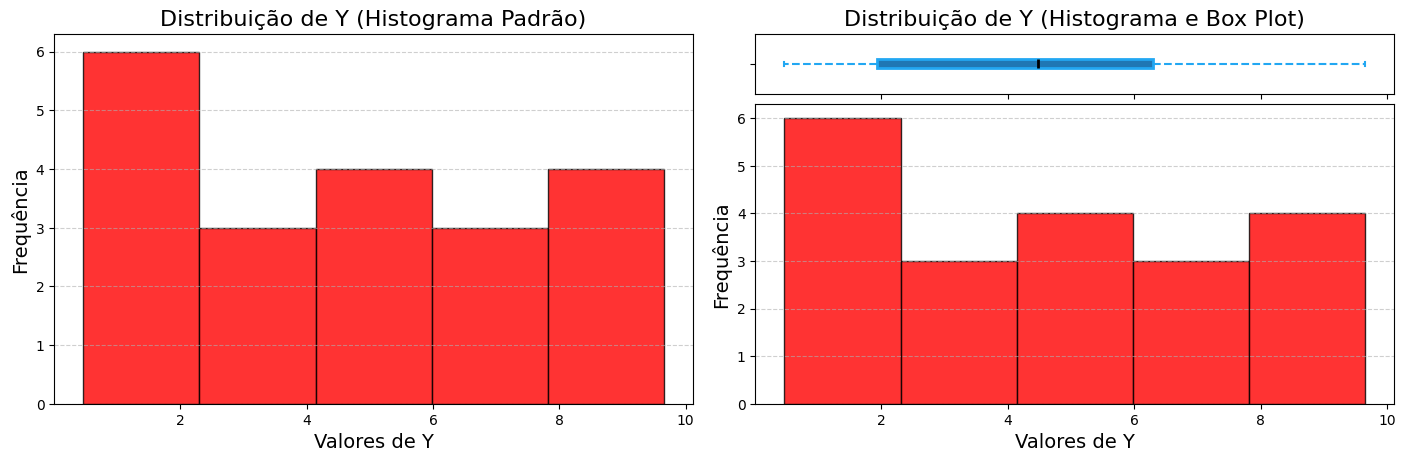

In [ ]:
np.random.seed(42)
data = {
    'x': np.random.rand(20) * 10,
    'y': np.random.rand(20) * 10,
    'z': np.random.rand(20) * 100,
    'x1': np.random.rand(20) * 10,
    'y1': np.random.rand(20) * 10
}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by='x').reset_index(drop=True)
df_sorted1 = df.sort_values(by='x1').reset_index(drop=True)

y_data = df['y']
y1_data = df['y1']
# Tamanho base (para 1 gráfico)
base_width_cm = 18
base_height_cm = 12
inches_per_cm = 1 / 2.54

# Tamanho total da figura
fig_width_in = (base_width_cm * 2) * inches_per_cm
fig_height_in = (base_height_cm * 1) * inches_per_cm

# Configurações de Texto
tamanho_titulo = 16
cor_titulo = 'black'
tamanho_label = 14
cor_label = 'black'

# Configurações Plot 1 & 2 (Histograma)
bins = 5
cor_hist = 'red'
borda_hist = 'black'
alpha_hist = 0.8

# Configurações do Box Plot
boxprops = dict(linestyle='-', linewidth=2, color=cor_borda_box)
medianprops = dict(linestyle='-', linewidth=2, color=mediana_box)
whiskerprops = dict(linestyle='--', linewidth=1.5, color=cor_box)
capprops = dict(linewidth=1.5, color=cor_box)

#Criação dos Subplots (Layout 1x1)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(fig_width_in, fig_height_in))


#Plot 1: Histograma Padrão (axs[1, 1])
ax1 = axs[0]
ax1.hist(y_data, bins=bins, color=cor_hist, edgecolor=borda_hist, alpha=alpha_hist)
ax1.set_xlabel('Valores de Y', fontsize=tamanho_label, color=cor_label)
ax1.set_ylabel('Frequência', fontsize=tamanho_label, color=cor_label)
ax1.set_title('Distribuição de Y (Histograma Padrão)', fontsize=tamanho_titulo, color=cor_titulo)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

#Plot 2: Histograma com Box Plot (axs[2, 0])
ax_hist = axs[1]
divider = make_axes_locatable(ax_hist)
ax_box = divider.append_axes("top", size="20%", pad=0.1, sharex=ax_hist)
# Box Plot (no eixo superior 'ax_box')
ax_box.boxplot(y_data, vert=False, patch_artist=True,
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'))

ax_box.set_title('Distribuição de Y (Histograma e Box Plot)', fontsize=tamanho_titulo, color=cor_titulo)
ax_box.tick_params(axis='y', labelleft=False)
ax_box.tick_params(axis='x', labelbottom=False)

# Histograma (no eixo inferior 'ax_hist')
ax_hist.hist(y_data, bins=bins, color=cor_hist, edgecolor=borda_hist, alpha=alpha_hist)
ax_hist.set_xlabel('Valores de Y', fontsize=tamanho_label, color=cor_label)
ax_hist.set_ylabel('Frequência', fontsize=tamanho_label, color=cor_label)
ax_hist.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

#plt.savefig('subplots_histograma.png', dpi=300)